In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
a = pd.read_csv("titanic_data.csv")
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


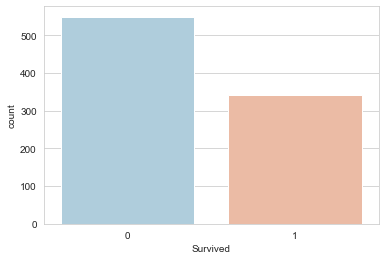

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=a,palette='RdBu_r')

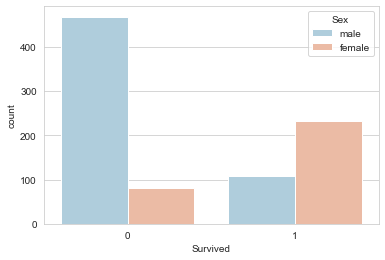

In [10]:
sns.countplot(x='Survived', hue='Sex', data= a,palette='RdBu_r')

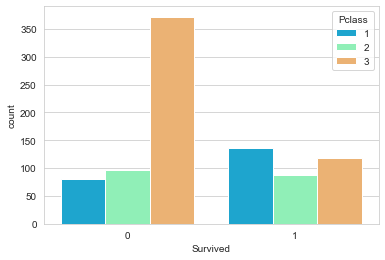

In [12]:
sns.countplot(x='Survived', hue='Pclass', data= a, palette='rainbow')

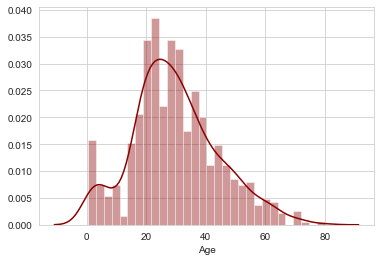

In [14]:
sns.distplot(a['Age'].dropna(),color='darkred',bins=30)

In [16]:
a['Age'].std()

14.526497332334044

In [17]:
a["Age"].mean()

29.69911764705882

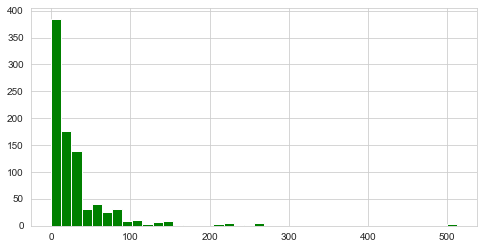

In [18]:
a['Fare'].hist(color='green',bins=40,figsize=(8,4))

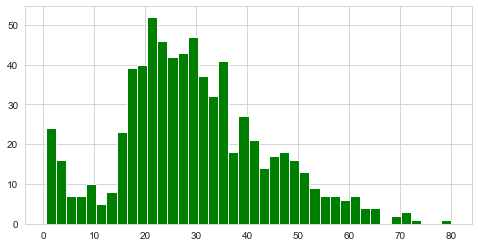

In [19]:
a['Age'].hist(color='green',bins=40,figsize=(8,4))

## DATA CLEANING

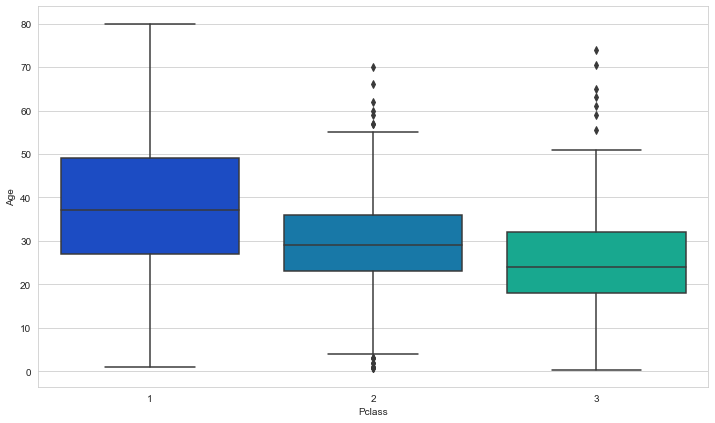

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=a,palette='winter')

In [21]:
def impute_age(cols):
   Age = cols[0]
   Pclass = cols[1]
   if pd.isnull(Age):
       if Pclass == 1:
           return 37
       elif Pclass == 2:
           return 29
       else:
           return 24
   else:
       return Age

a['Age'] = a[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [23]:
def impute_cabin(col):
   Cabin = col[0]
   if type(Cabin) == str:
       return 1
   else:
       return 0

a['Cabin'] = a[['Cabin']].apply(impute_cabin, axis = 1)

In [24]:
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [25]:
dataset = a

sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dataset = pd.concat([dataset,sex,embark],axis=1)

In [26]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,1
